# 06_01_plot_Spectro CAL data

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [2]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, pandas, matplotlib, scipy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")


sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** scipy module is already installed.
******** astropy module is already installed.
******** photutils module is already installed.
******** ccdproc module is already installed.
******** version_information module is already installed.
This notebook was generated at 2024-09-04 11:17:59 (KST = GMT+0900) 
0 Python     3.12.4 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 5.15.0 119 generic x86_64 with glibc2.31
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.9.2
6 scipy      1.14.1
7 astropy    6.1.0
8 photutils  1.12.0
9 ccdproc    2.4.2
10 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [3]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import astropy.units as u
#from astropy.stats import sigma_clip
#from ccdproc import combine, ccd_process, CCDData
from astropy.io import fits
import matplotlib.pyplot as plt

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

"CAL-BDF" 폴더 찾기

In [10]:
#%%
BASEDIR = Path("/mnt/Rdata/OBS_data") 
PROJECDIR = BASEDIR/ "2024-Spectra"
TODODIR = PROJECDIR / "TEC140_ASI183MMPro_2024-05_1bin"
# TODODIR = PROJECDIR / "_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"


DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

MASTERDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
MASTERDIR = Path(MASTERDIR[0]) / _astro_utilities.master_dir
print ("MASTERDIR: ", format(MASTERDIR))

BDFDIR = [x for x in DOINGDIRs if "SPTR-CAL_" in str(x)]
print ("BDFDIR: ", format(BDFDIR))

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
DOINGDIRs = sorted([x for x in DOINGDIRs if not "SPTR-CAL_" in str(x)])
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = '2024-08-30'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in x]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/-_CAL-BDF_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP27989-BETELGEUSE_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP31681-ALHENA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32246-MEBSUTA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-HIP32349-SIRIUS_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro

## CAL summary 만들기

In [11]:
BDFDIR = Path(BDFDIR[0])
print("BDFDIR", BDFDIR)

summary = yfu.make_summary(BDFDIR/"*.fit*")

if summary is not None :
    print("len(summary):", len(summary))
    print("summary:", summary)
    print(summary["file"][0])

BDFDIR /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin
All 49 keywords (guessed from /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183MMPro_2024-05_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/SPTR-CAL_LIGHT__2024-05-14-06-15-05_2sec_TEC140_ASI183MMPro_-9c_1bin.fit) will be loaded.
len(summary): 69
summary:                                                  file  filesize  SIMPLE  \
0   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  40368960    True   
1   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  40368960    True   
2   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  40368960    True   
3   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  40368960    True   
4   /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  40368960    True   
..                                                ...       ...     ...   
64  /mnt/Rdata/OBS_data/2024-Spectra/TEC140_ASI183...  40368960    True   
65  /

### 자료 display



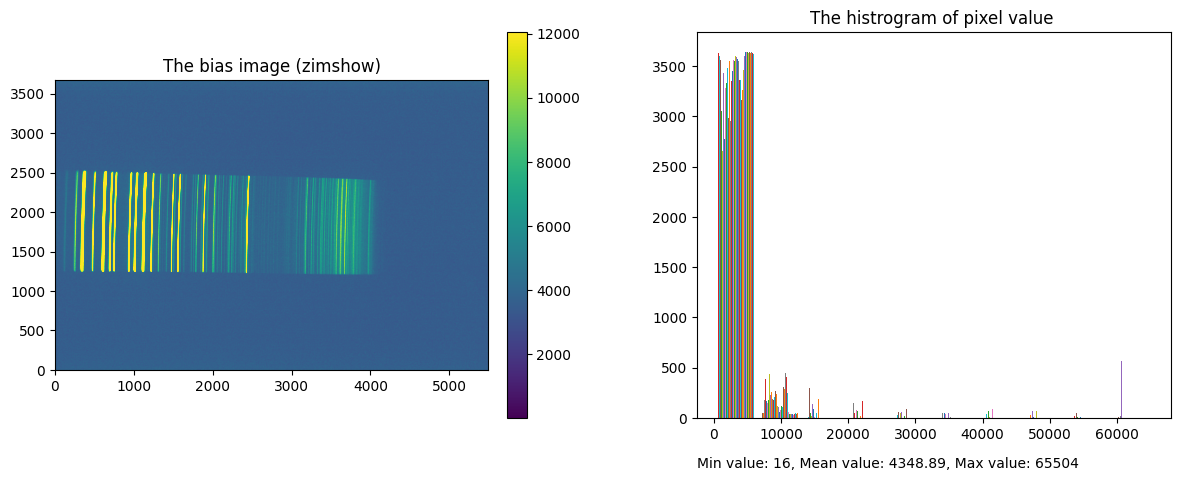

In [12]:
fpath = Path(summary["file"][0])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], 
                    hdul[0].data,
                    origin="lower",
                    cmap = "viridis"
                    )
im2 = axs[1].hist(hdul[0].data,
                )

axs[0].set_title('The bias image (zimshow)')
axs[1].set_title('The histrogram of pixel value ')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

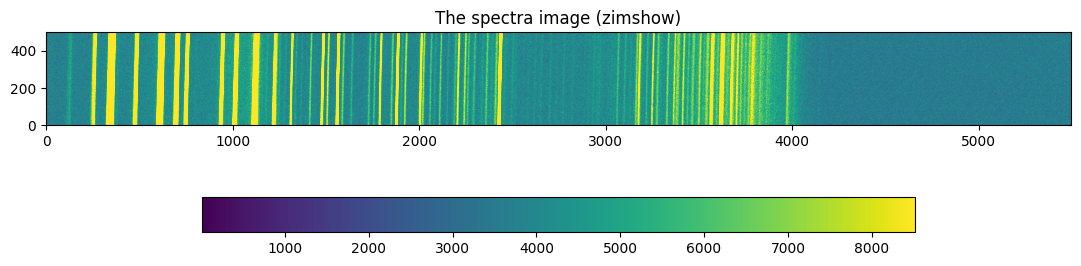

In [13]:
fpath = Path(summary["file"][0])
hdul = fits.open(fpath)

fig, axs = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs, 
                                hdul[0].data[1500:2000, :],
                                origin="lower",
                                cmap = "viridis",
                                )

axs.set_title('The spectra image (zimshow)')

plt.colorbar(im1, fraction=0.15, pad=0.3, location='bottom')
plt.tight_layout(pad=5.0)

In [14]:
fpath = Path(summary["file"][0])
hdul = fits.open(fpath)

    fig, axs = plt.subplots(1, 1, figsize=(12, 4), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs, 
                                np.flip(hdul[0].data[1500:2000, :], axis=1), # flip horizental
                                origin="lower",
                                cmap = "viridis",
                                )

axs.set_title('The spectra image (zimshow)')

plt.colorbar(im1, fraction=0.15, pad=0.3, location='bottom')
plt.tight_layout(pad=5.0)

IndentationError: unexpected indent (987237270.py, line 4)

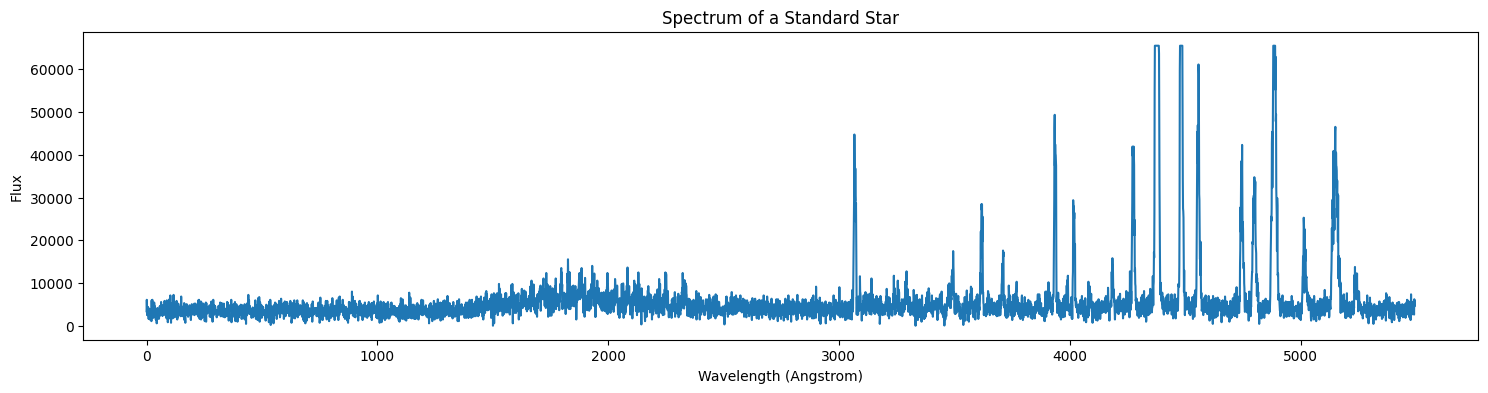

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits

plt.figure(figsize=(18, 4))  
data = np.flip(hdul[0].data[1500:2000, :], axis=1)
header = hdul[0].header

# 필요한 데이터 추출
wavelength = data[0,:]
flux = data[1]

# 플롯 생성
plt.plot(flux)
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Spectrum of a Standard Star')
plt.show()

스펙트럼이 'vega_calspec_spectrum.png' 파일로 저장되었습니다.


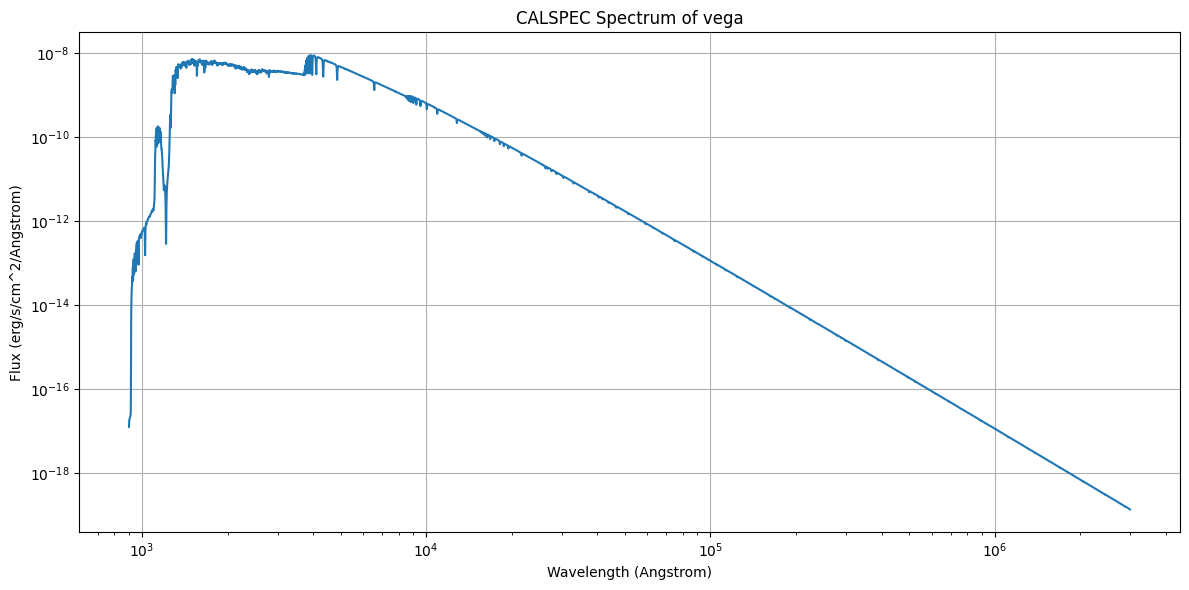

In [50]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import download_file
import numpy as np

def get_calspec_spectrum(star_name):
    # CALSPEC 데이터 URL
    base_url = "https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/"
    # base_url = "https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calobs/"
    # file_name = f"{star_name.lower()}_mod_010.fits"
    file_name = f"alpha_lyr_mod_004.fits"
    url = base_url + file_name

    try:
        # 파일 다운로드
        local_file = download_file(url, cache=True)
        
        # FITS 파일 열기
        with fits.open(local_file) as hdul:
            data = hdul[1].data
            wavelength = data['WAVELENGTH']
            flux = data['FLUX']
        
        return wavelength, flux
    except Exception as e:
        print(f"오류 발생: {e}")
        return None, None

def plot_spectrum(wavelength, flux, star_name):
    plt.figure(figsize=(12, 6))
    plt.plot(wavelength, flux)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
    plt.title(f'CALSPEC Spectrum of {star_name}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.tight_layout()
    
    # 스펙트럼 저장
    plt.savefig(f'{star_name.lower()}_calspec_spectrum.png')
    print(f"스펙트럼이 '{star_name.lower()}_calspec_spectrum.png' 파일로 저장되었습니다.")
    
    plt.show()

def main():
    # CALSPEC 데이터베이스에 있는 별 이름 예시
    star_name = "vega"  # 다른 CALSPEC 별로 변경 가능
    
    wavelength, flux = get_calspec_spectrum(star_name)
    
    if wavelength is not None and flux is not None:
        plot_spectrum(wavelength, flux, star_name)
    else:
        print("스펙트럼 데이터를 가져오는 데 실패했습니다.")

if __name__ == "__main__":
    main()